In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [2]:
df=pd.read_csv("new_train.csv")
df.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,...,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,6/1/2010,1889.7,1890.00,1838.00,1855.10,1855.75,568273,1.054570e+14,285.40,285.95,...,844.44,3878011,3.274750e+14,1235.0,1238.00,1177.0,1181.70,1197.29,1786082,2.138450e+14
1,6/2/2010,1848.0,1862.75,1828.00,1853.05,1842.82,945167,1.741770e+14,284.00,284.80,...,838.31,3320996,2.784040e+14,1195.0,1206.95,1168.5,1201.15,1189.87,1307410,1.555650e+14
2,6/3/2010,1864.1,1910.00,1864.10,1905.60,1893.91,679689,1.287270e+14,283.00,286.85,...,853.51,2494522,2.129100e+14,1211.0,1248.00,1211.0,1242.30,1231.63,1482919,1.826400e+14
3,6/4/2010,1906.0,1909.80,1880.10,1885.70,1889.21,509435,9.624280e+13,288.85,291.80,...,862.85,2963920,2.557410e+14,1240.0,1258.00,1240.0,1245.45,1249.72,1454459,1.817670e+14
4,6/7/2010,1867.0,1894.85,1808.35,1876.65,1873.32,961913,1.801970e+14,285.00,289.10,...,839.89,3471483,2.915670e+14,1218.6,1225.00,1196.0,1214.80,1209.27,1424594,1.722730e+14


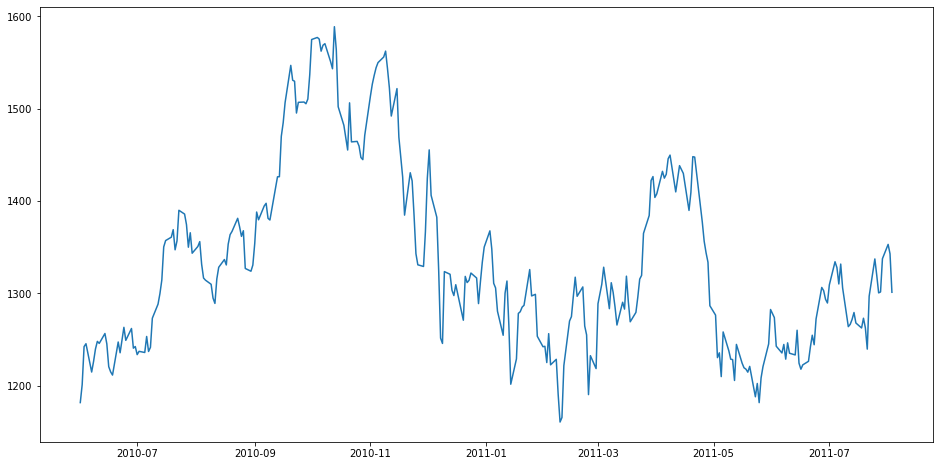

In [4]:
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close-Stock-5"],label='Close Price history')

In [5]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [6]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close-Stock-5'])

In [7]:
new_dataset

,Date,Close-Stock-5
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
294,NaN,NaN
295,NaN,NaN
296,NaN,NaN
297,NaN,NaN


In [8]:
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close-Stock-5"][i]=data["Close-Stock-5"][i]

In [9]:
new_dataset

,Date,Close-Stock-5
0,2010-06-01 00:00:00,1181.7
1,2010-06-02 00:00:00,1201.15
2,2010-06-03 00:00:00,1242.3
3,2010-06-04 00:00:00,1245.45
4,2010-06-07 00:00:00,1214.8
...,...,...
294,2011-07-28 00:00:00,1301.5
295,2011-07-29 00:00:00,1337.5
296,2011-08-01 00:00:00,1353
297,2011-08-02 00:00:00,1342.8


In [10]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

In [11]:
new_dataset

,Close-Stock-5
Date,
2010-06-01,1181.7
2010-06-02,1201.15
2010-06-03,1242.3
2010-06-04,1245.45
2010-06-07,1214.8
...,...
2011-07-28,1301.5
2011-07-29,1337.5
2011-08-01,1353


In [12]:
final_dataset=new_dataset.values

In [13]:
final_dataset

array([[1181.7],
       [1201.15],
       [1242.3],
       [1245.45],
       [1214.8],
       [1226.2],
       [1239.65],
       [1248.0],
       [1245.8],
       [1256.5],
       [1245.25],
       [1220.6],
       [1215.0],
       [1211.5],
       [1247.3],
       [1235.65],
       [1249.4],
       [1263.2],
       [1249.1],
       [1261.95],
       [1240.65],
       [1242.4],
       [1233.65],
       [1237.2],
       [1235.95],
       [1253.3],
       [1237.05],
       [1241.55],
       [1273.1],
       [1288.3],
       [1299.7],
       [1314.45],
       [1350.3],
       [1357.15],
       [1360.8],
       [1368.95],
       [1347.15],
       [1356.8],
       [1389.95],
       [1385.85],
       [1374.45],
       [1349.95],
       [1365.6],
       [1343.45],
       [1350.75],
       [1356.0],
       [1331.4],
       [1316.6],
       [1314.3],
       [1309.8],
       [1294.9],
       [1289.1],
       [1315.6],
       [1328.2],
       [1336.6],
       [1330.75],
       [1353.25],
       [

In [14]:
train_data=final_dataset[0:236,:]#79%
valid_data=final_dataset[236:,:]

In [16]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

In [18]:
x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [19]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

In [20]:
lstm_model.compile(loss='mean_squared_error',optimizer='Adamax')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

176/176 - 5s - loss: 0.0314


In [21]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

In [22]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

In [23]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [24]:
X_test

array([[[0.07019388],
        [0.        ],
        [0.01144592],
        ...,
        [0.17507592],
        [0.11492642],
        [0.22786732]],

       [[0.        ],
        [0.01144592],
        [0.14260687],
        ...,
        [0.11492642],
        [0.22786732],
        [0.18009811]],

       [[0.01144592],
        [0.14260687],
        [0.25554777],
        ...,
        [0.22786732],
        [0.18009811],
        [0.15895819]],

       ...,

       [[0.18009811],
        [0.15895819],
        [0.15790703],
        ...,
        [0.32667601],
        [0.32901191],
        [0.41310441]],

       [[0.15895819],
        [0.15790703],
        [0.10511563],
        ...,
        [0.32901191],
        [0.41310441],
        [0.44931091]],

       [[0.15790703],
        [0.10511563],
        [0.19633263],
        ...,
        [0.41310441],
        [0.44931091],
        [0.4254847 ]]])

In [25]:
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

In [ ]:
lstm_model.save("saved_lstm_model.h5")

<ipython-input-26-9d5d0a6e776f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=closing_price


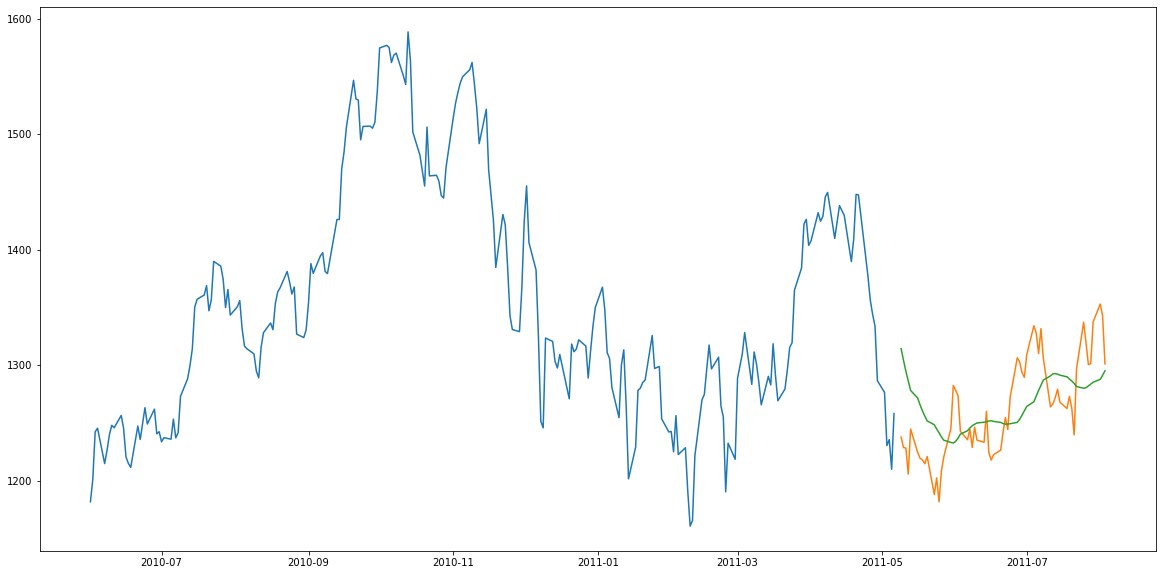

In [26]:
train_data=new_dataset[:236]
valid_data=new_dataset[236:]
valid_data['Predictions']=closing_price
plt.plot(train_data["Close-Stock-5"])
plt.plot(valid_data[['Close-Stock-5',"Predictions"]])

In [ ]:
closing_price

In [ ]:
predictions= pd.DataFrame(closing_price, columns = ['prediction'])

In [ ]:
predictions.size

In [ ]:
predictions.to_csv (r'C:\Users\MarkCichonski\Learn ML 2021 Grand AI Challenge\resultstt.csv', index = False, header=True)

In [ ]:
#Run #1 1 Epoch Batch Size 1  .0194 .0018 .0098 .0285 .0299 optimizer adam
#Run #2 10 Epoch Batch Size 1 .0020 4.17-4 .0022 .0041 .0065 optimizer adam
#Also tried SGD, RMSprop, adaDelta, adagrad
#Run #3 40 Epoch Batch Size 1  6.00-4 3.21-4 .0016 .0031 .0050 optimizer='Adamax'